In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Yf=4.35*10**-7
mchi=np.logspace(-2,2,40)


def format_to_3_sigfigs(x):
    # Format to 3 significant digits in scientific notation for large/small numbers
    if abs(x) >= 1000 or (abs(x) < 0.01 and x != 0):
        s = f"{x:.3g}"
        return s  # returns string like '1e3'
    else:
        s = f"{x:.3g}"
        # Remove trailing zeros and dot if present
        if '.' in s:
            s = s.rstrip('0').rstrip('.')
        val = float(s)
        if val.is_integer():
            return int(val)
        else:
            return val


plot_g1 = []
for i in range(len(mchi)):
    data = np.loadtxt(f'Yf_vs_gnu_mod1_mchi_{format_to_3_sigfigs(mchi[i])}.txt')
    g_values = data[:, 0]   # First column: g
    Yf_values = data[:, 1]  # Second column: Yf
    g_interpolator = interp1d(Yf_values, g_values, kind='linear', fill_value="extrapolate")
    def get_g_for_Yf(Yf):
        return g_interpolator(Yf)
    plot_g1.append(get_g_for_Yf(Yf / mchi[i]))

plot_g2 = []
for i in range(len(mchi)):
    data = np.loadtxt(f'Yf_vs_gnu_mod2_mchi_{format_to_3_sigfigs(mchi[i])}.txt')
    g_values = data[:, 0]   # First column: g
    Yf_values = data[:, 1]  # Second column: Yf
    g_interpolator = interp1d(Yf_values, g_values, kind='linear', fill_value="extrapolate")
    def get_g_for_Yf(Yf):
        return g_interpolator(Yf)
    plot_g2.append(get_g_for_Yf(Yf / mchi[i]))

plot_g3 = []
for i in range(len(mchi)):
    data = np.loadtxt(f'Yf_vs_gnu_mod3_mchi_{format_to_3_sigfigs(mchi[i])}.txt')
    g_values = data[:, 0]   # First column: g
    Yf_values = data[:, 1]  # Second column: Yf
    g_interpolator = interp1d(Yf_values, g_values, kind='linear', fill_value="extrapolate")
    def get_g_for_Yf(Yf):
        return g_interpolator(Yf)
    plot_g3.append(get_g_for_Yf(Yf / mchi[i]))

In [3]:


plot_g4 = []
for i in range(len(mchi)):
    data = np.loadtxt(f'Yf_vs_gnu_mod4_mchi_{format_to_3_sigfigs(mchi[i])}.txt')
    g_values = data[:, 0]   # First column: g
    Yf_values = data[:, 1]  # Second column: Yf
    g_interpolator = interp1d(Yf_values, g_values, kind='linear', fill_value="extrapolate")
    def get_g_for_Yf(Yf):
        return g_interpolator(Yf)
    plot_g4.append(get_g_for_Yf(Yf / mchi[i]))

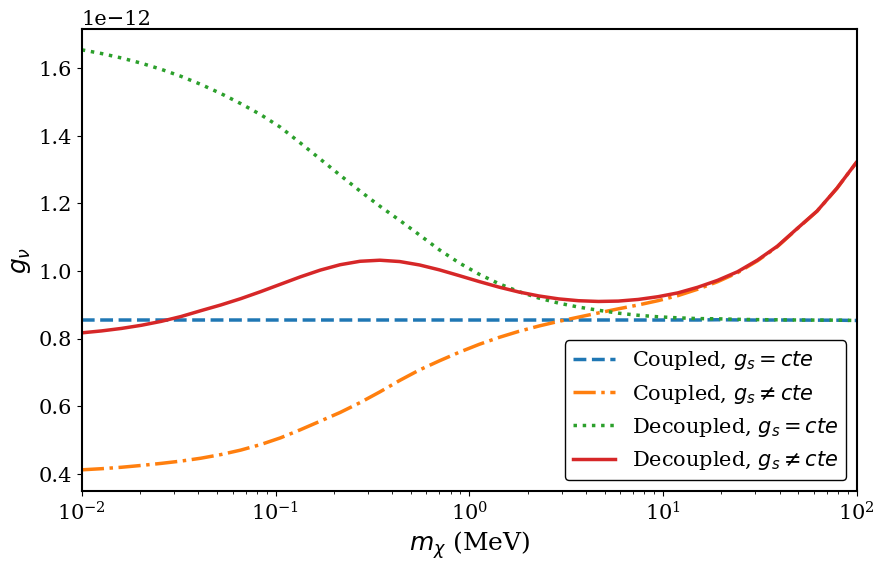

In [5]:
import matplotlib as mpl
# Set global matplotlib parameters for publication quality
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 16,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 15,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "axes.linewidth": 1.5,
    "lines.linewidth": 2.5,
    "legend.frameon": True,
    "legend.framealpha": 0.98,
    "legend.fancybox": True,
    "legend.edgecolor": "black",
    "text.usetex": False,
})
plt.figure(figsize=(10, 6))
plt.plot(mchi, plot_g1,'--', label=fr'Coupled, $g_s=cte$')
plt.plot(mchi,plot_g4, '-.',label=fr'Coupled, $g_s\neq cte$')
plt.plot(mchi,plot_g3,linestyle='dotted',label=fr'Decoupled, $g_s=cte$')
plt.plot(mchi,plot_g2,label=fr'Decoupled, $g_s\neq cte$')
plt.xlabel(fr'$m_\chi$ (MeV)')
plt.ylabel(fr'$g_\nu$')
plt.xscale('log')
plt.xlim(1e-2,1e2)
plt.legend()